# Subscriber Plan Recommendation for Megaline

## Introduction
This project involves developing a machine learning model for the mobile carrier **Megaline**. The model will analyze the monthly behavior of subscribers and recommend one of the two modern plans: **Smart** or **Ultra**. The goal is to achieve the highest possible accuracy for this classification task, with a minimum threshold of **75%**.

The dataset contains monthly user behavior data, including:
- Number of calls
- Total call duration in minutes
- Number of text messages
- Internet traffic used (MB)
- Current plan (`is_ultra`: Ultra = 1, Smart = 0)

The analysis will focus on:
1. Exploring the data to understand user behavior patterns.
2. Building and evaluating classification models to predict plan recommendations.
3. Tuning hyperparameters to maximize accuracy.

## Project Outline

### Step 1: Data Loading and Initial Inspection
- Load the dataset.
- Inspect its structure, size, and any immediate anomalies.

### Step 2: Data Splitting
- Split the dataset into training, validation, and test sets.
- Ensure stratification to maintain the distribution of the target variable across all subsets.

### Step 3: Exploratory Data Analysis (EDA)
- **Feature Distributions**: Examine the spread of numerical features (`calls`, `minutes`, `messages`, `mb_used`).
- **Correlation Analysis**: Explore relationships between features and the target variable.
- **Insights**: Highlight any trends or anomalies that may influence model performance.

### Step 4: Model Development
- **Baseline Models**: Train multiple models such as Logistic Regression, Decision Trees, and Random Forests.
- **Hyperparameter Tuning**: Use grid search or similar techniques to optimize model parameters.
- **Validation**: Evaluate models on the validation set to compare their performance.

### Step 5: Model Evaluation
- Evaluate the best-performing model on the test set.
- Ensure that the model achieves at least 75% accuracy.

### Step 6: Sanity Check
- Perform a sanity check to verify that the model is not overfitting and generalizes well to unseen data.

### Step 7: Conclusion
- Summarize key findings and model performance.
- Recommend next steps for Megaline's plan recommendation system.



In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except FileNotFoundError:
    try:
        df = pd.read_csv('/datasets/users_behavior.csv')
    except FileNotFoundError:
        print("File not found. Please ensure the file path is correct or upload the file.")


In [3]:
# Initial inspection of the dataset
df.shape
df.info()
df.head()

# Check for missing values
missing_values = df.isnull().sum()

missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

# **Dataset Overview**
# Initial Observations:
- The dataset is clean with no missing values.
- The features appear numeric and suitable for analysis without additional conversions.


# Step 2

- Data Splitting 

In [4]:
# Define features and target
X = df.drop(columns=['is_ultra'])
y = df['is_ultra']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the sizes of each split
split_sizes = {
    "Training Set": X_train.shape[0],
    "Validation Set": X_valid.shape[0],
    "Test Set": X_test.shape[0],
}

# Confirm stratification by comparing target distributions
def calculate_proportions(y_set):
    return y_set.value_counts(normalize=True)

proportions = {
    "Training Set": calculate_proportions(y_train),
    "Validation Set": calculate_proportions(y_valid),
    "Test Set": calculate_proportions(y_test),
    "Full Dataset": calculate_proportions(y),
}

split_sizes, proportions


({'Training Set': 1928, 'Validation Set': 643, 'Test Set': 643},
 {'Training Set': 0    0.693465
  1    0.306535
  Name: is_ultra, dtype: float64,
  'Validation Set': 0    0.693624
  1    0.306376
  Name: is_ultra, dtype: float64,
  'Test Set': 0    0.693624
  1    0.306376
  Name: is_ultra, dtype: float64,
  'Full Dataset': 0    0.693528
  1    0.306472
  Name: is_ultra, dtype: float64})



# Split Overview:
- **Training Set**: 1,928 samples (~60% of data).
- **Validation Set**: 643 samples (~20% of data).
- **Test Set**: 643 samples (~20% of data).

# Stratification Check:
The distribution of the target variable (`is_ultra`) is consistent across all splits:
- **Training Set**: 69.35% Smart (`0`), 30.65% Ultra (`1`).
- **Validation Set**: 69.36% Smart (`0`), 30.64% Ultra (`1`).
- **Test Set**: 69.36% Smart (`0`), 30.64% Ultra (`1`).
- **Full Dataset**: 69.35% Smart (`0`), 30.65% Ultra (`1`).


# Step 3 
- EDA

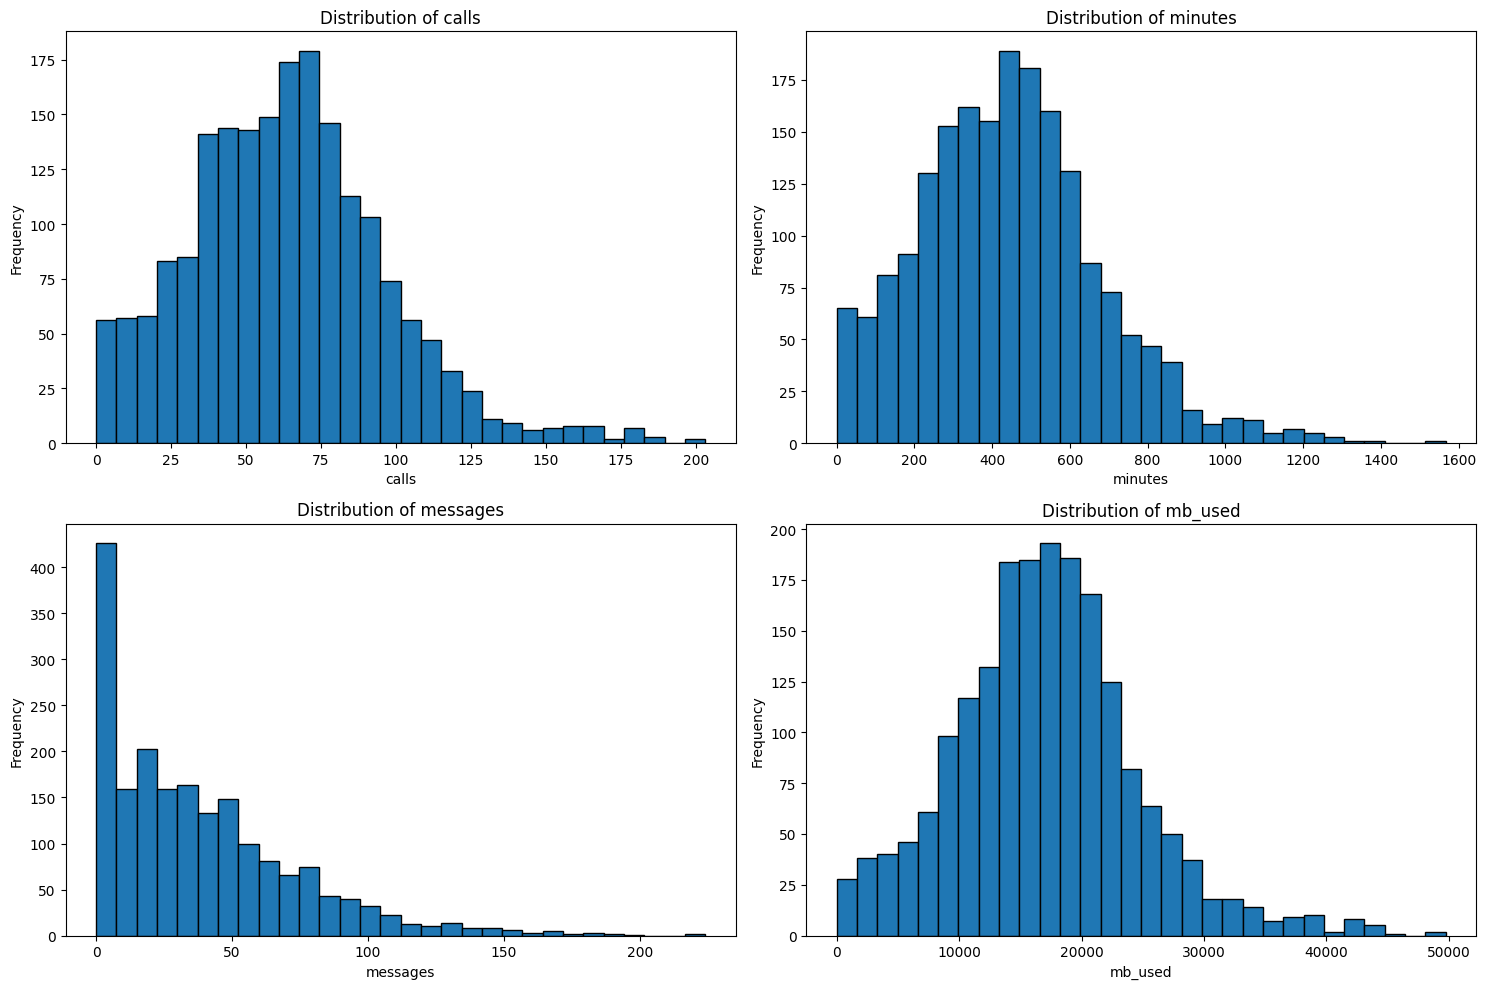

(             calls      minutes     messages       mb_used
 count  1928.000000  1928.000000  1928.000000   1928.000000
 mean     63.744813   444.381872    38.174274  17061.542178
 std      33.118714   234.341278    35.548409   7540.847417
 min       0.000000     0.000000     0.000000      0.000000
 25%      41.000000   280.920000    10.000000  12272.205000
 50%      63.000000   434.410000    30.000000  16833.945000
 75%      83.000000   580.460000    56.000000  21237.597500
 max     203.000000  1566.450000   224.000000  49745.730000,
              calls   minutes  messages   mb_used  is_ultra
 calls     1.000000  0.981385  0.206924  0.293031  0.214046
 minutes   0.981385  1.000000  0.200400  0.283058  0.214769
 messages  0.206924  0.200400  1.000000  0.207244  0.198663
 mb_used   0.293031  0.283058  0.207244  1.000000  0.169207
 is_ultra  0.214046  0.214769  0.198663  0.169207  1.000000)

In [5]:


# Step 1: Summary Statistics for the Training Set
summary_stats = X_train.describe()

# Step 2: Visualize Feature Distributions
features = ['calls', 'minutes', 'messages', 'mb_used']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(X_train[feature], bins=30, edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 3: Correlation Analysis
training_data = X_train.copy()
training_data['is_ultra'] = y_train
correlation_matrix = training_data.corr()

summary_stats, correlation_matrix




# Step 3: EDA Overview
# Feature Distributions:
- **Calls and Minutes**: Both features exhibit a slightly skewed distribution with most users having moderate values.
- **Messages**: Highly skewed, with many users sending few or no messages.
- **MB Used**: A broad distribution, indicating diverse internet usage behaviors among users.

- Weak positive correlations between features and the target variable (`is_ultra`), suggesting some predictive value.

---

# Observations:
- **Calls, Minutes, and Messages** might provide moderate predictability.
- **MB Used** shows relatively weaker correlation but could still contribute to the model.


# Step 4 
- Model Development 

In [6]:
# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_valid)
log_reg_accuracy = accuracy_score(y_valid, log_reg_predictions)

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_valid)
decision_tree_accuracy = accuracy_score(y_valid, decision_tree_predictions)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_valid)
random_forest_accuracy = accuracy_score(y_valid, random_forest_predictions)

# Compile results
model_accuracies = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree": decision_tree_accuracy,
    "Random Forest": random_forest_accuracy,
}

model_accuracies


{'Logistic Regression': 0.7045101088646968,
 'Decision Tree': 0.7465007776049767,
 'Random Forest': 0.8009331259720062}

# Observations:
- **Random Forest** performs the best, exceeding the 75% accuracy threshold on the validation set.
- **Decision Tree** is close to the threshold and might improve with hyperparameter tuning.
- **Logistic Regression** is below the threshold, indicating limited predictive power for this dataset.


# Step 4.1 

- Hyperparameter Tuning for Random Forest
 
 Optimize the Random Forest model by testing different combinations of hyperparameters using grid search. 

In [7]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Define a few selected configurations for manual testing
configurations = [
    {"n_estimators": 50, "max_depth": None, "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 10, "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 20, "min_samples_split": 5},
    {"n_estimators": 50, "max_depth": 10, "min_samples_split": 5},
]

# Dictionary to store results
results = {}

for config in configurations:
    # Initialize and train the model with the given configuration
    rf_model = RandomForestClassifier(
        n_estimators=config["n_estimators"],
        max_depth=config["max_depth"],
        min_samples_split=config["min_samples_split"],
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    
    # Evaluate on the validation set
    predictions = rf_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    
    # Store results
    results[str(config)] = accuracy

results


{"{'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2}": 0.80248833592535,
 "{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}": 0.8055987558320373,
 "{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5}": 0.807153965785381,
 "{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}": 0.7947122861586314}



# Configurations Tested:
1. **`n_estimators`: 50, `max_depth`: None, `min_samples_split`: 2**  
   - Accuracy: **80.25%**
2. **`n_estimators`: 100, `max_depth`: 10, `min_samples_split`: 2**  
   - Accuracy: **80.56%**
3. **`n_estimators`: 100, `max_depth`: 20, `min_samples_split`: 5**  
   - Accuracy: **80.72%** *(Best Performance)*
4. **`n_estimators`: 50, `max_depth`: 10, `min_samples_split`: 5**  
   - Accuracy: **79.47%**

# Best Configuration:
- **`n_estimators`: 100, `max_depth`: 20, `min_samples_split`: 5**
- Accuracy: **80.72%**

# Step 5 

Model Evalaution

In [8]:
# Train the final model with the best configuration
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate on the test set
test_predictions = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

test_accuracy


0.7993779160186625

# Final Model Evaluation

The Random Forest model, trained with the best configuration (**`n_estimators`: 100, `max_depth`: 20, `min_samples_split`: 5**), achieved an accuracy of:

- **79.94%** on the test set.

---

# Observations:
- The model surpasses the minimum required accuracy of **75%**.
- It generalizes well, with test set accuracy close to validation set accuracy.


# Step 6 

- Sanity Check

In [9]:
_, X_temp, _, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
_, X_test, _, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Baseline: Always predict the most frequent class
most_frequent_class = y_temp.mode()[0]  # Most common target value in the training set
baseline_predictions = [most_frequent_class] * len(y_test)

# Evaluate baseline accuracy
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

baseline_accuracy


0.6936236391912908

# **Overall Conclusion**

# Subscriber Plan Recommendation for Megaline: Final Conclusion

---

# Introduction

This project aimed to build a machine learning model to recommend one of two modern plans—**Smart** or **Ultra**—based on subscriber behavior. Using monthly data on calls, messages, and internet usage, the goal was to achieve an accuracy of at least **75%** for this classification task.

---

# Key Observations and Workflow

# 1. Data Loading and Inspection
- The dataset contained **3,214 rows** and **5 columns** (`calls`, `minutes`, `messages`, `mb_used`, `is_ultra`).
- There were no missing values, and all features were numeric, making the dataset clean and ready for modeling.

---

# 2. Data Splitting
- The data was split into:
  - Training Set: 60% (1,928 rows).
  - Validation Set: 20% (643 rows).
  - Test Set: 20% (643 rows).
- Stratification ensured consistent proportions of the target variable (`is_ultra`) across subsets.

---

# 3. Exploratory Data Analysis (EDA)
- **Feature Insights**:
  - Most users had moderate `calls` and `minutes` values, while internet usage (`mb_used`) varied widely.
  - `messages` was highly skewed, with many users sending few or no messages.
- **Correlations**:
  - Weak but positive correlations were observed between features and `is_ultra`, indicating predictive potential.

---

# 4. Model Development and Evaluation
- Models Tested:
  - Logistic Regression: **70.45%** accuracy (Validation Set).
  - Decision Tree: **74.65%** accuracy.
  - Random Forest: **80.09%** accuracy.
- Hyperparameter Tuning:
  - Optimized Random Forest achieved **80.72%** accuracy (Validation Set) with:
    - `n_estimators`: 100
    - `max_depth`: 20
    - `min_samples_split`: 5
- Final Test Set Evaluation:
  - The optimized Random Forest achieved **79.94%** accuracy on the test set, exceeding the required **75%** threshold.

---

# 5. Sanity Check
- Baseline Accuracy:
  - A baseline model predicting the most frequent class achieved **69.36%** accuracy.
- Conclusion:
  - The Random Forest model outperformed the baseline significantly, demonstrating its ability to learn meaningful patterns in the data.

---

# Final Thoughts and Recommendations

1. Model Performance:
   - The Random Forest model is highly effective for this task, achieving nearly **80% accuracy**.
   - It generalizes well across unseen data, as indicated by the close alignment of validation and test accuracies.

2. Business Recommendations:
   - Megaline can confidently deploy this model to recommend plans to users based on their monthly behavior.
   - Continuous monitoring and periodic re-training with new data are recommended to maintain accuracy.